In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nutrition-facts/menu.csv


In [2]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

<font size=4><b>Read the Data</b></font>

In [3]:
df=pd.read_csv('../input/nutrition-facts/menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


<font size=4><b>Checking for null values</b></font>

<AxesSubplot:>

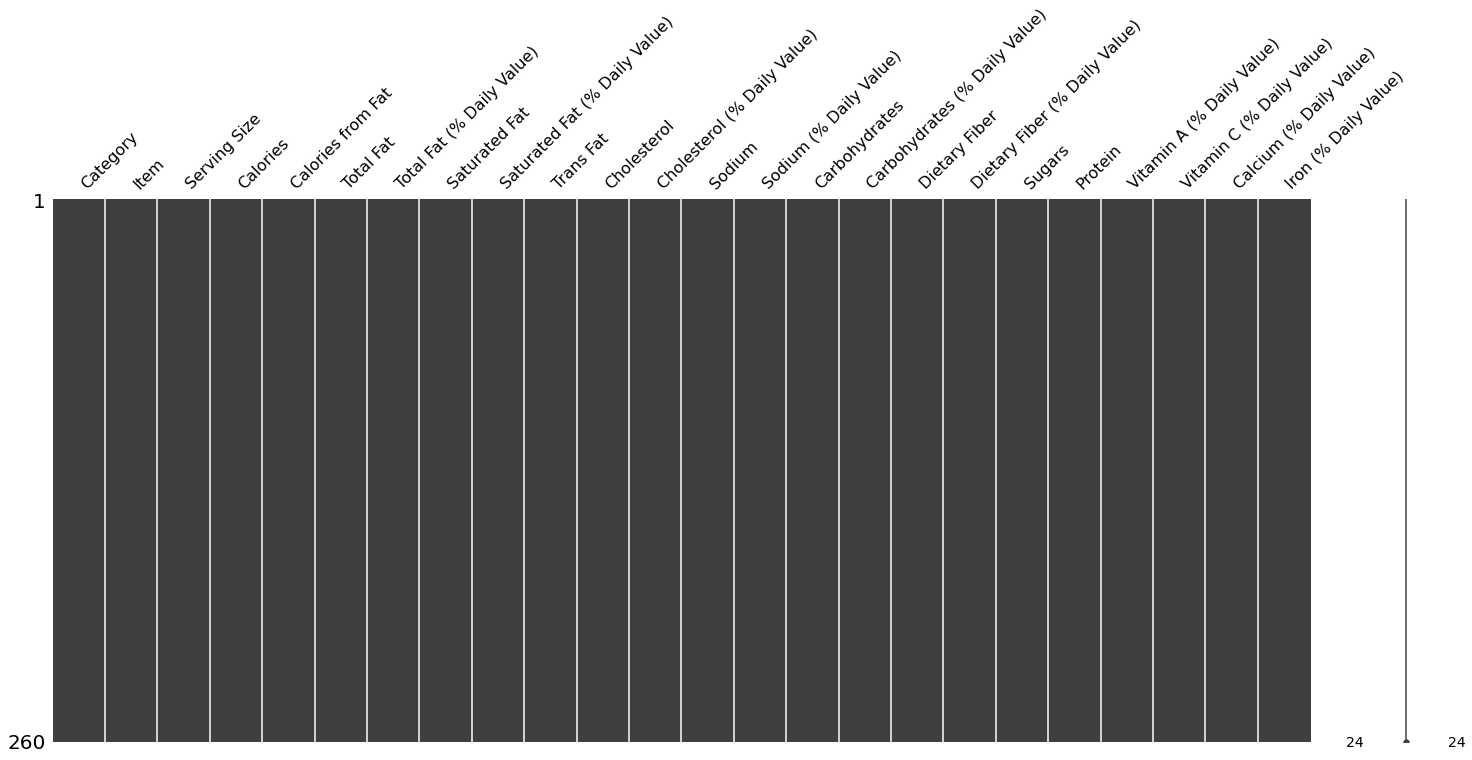

In [4]:
msno.matrix(df)

<font size=4><b>Unique values in Category Column</b></font>

In [5]:
df.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

<font size=3>Below we analyse the count for each Category in McDonald's menu. We observe that Coffee and Tea has been consumed heavily by the customers</font>

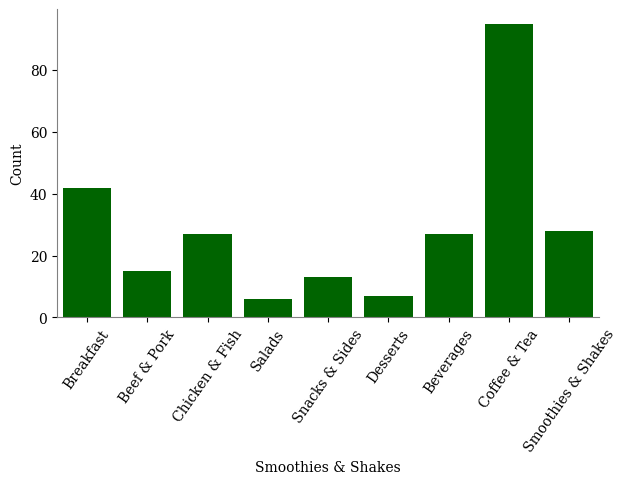

In [6]:
plt.style.use('default')
plt.figure(figsize=(7,4),edgecolor='0.1',dpi=100)
a=sns.countplot(x='Category',facecolor='darkgreen',data=df)


xticks=plt.xticks(rotation=55,family='serif')
yticks=plt.yticks(family='serif')

plt.xlabel(df['Category'].all(),font='serif')
plt.ylabel('Count',font='serif')

a.spines['bottom'].set_color('gray')
a.spines['left'].set_color('gray')
sns.despine()

<font size=5><b>Analysis of Number of Items per Category</b></font>
<br>
<font size=4>Below we observe that Coffee and Tea category has the most number of unique items followed by Breakfast in the menu.</font>

In [7]:
px.density_heatmap(x='Category',y='Item',data_frame=df,width=900)

<font size=5><b>Analysis of Nutrients</b></font>

<font size=4><b>Average Calories distribution for each category</b></font>
<br>
<font size=3>Below we observe hightest amount of calories for Chicken & fish followed by Breakfast and Smoothies</font>

In [8]:
calories=pd.DataFrame(df.groupby('Category')['Calories'].mean())
        
colors=['gray']*9
colors[3]='#AF0038'
fig = go.Figure(data=[go.Bar(
    x=calories.index,
    y=calories['Calories'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_yaxes(title='Avg Calories')
fig.show()

<font size=5><b>Total Fat</b></font>
<br>
<font size=3>Below is the avg Total Fat distribution for each category.We have breakfast ,Chicken & Fish and Beef & Pork at the forefront when it comes to the amount of Fat intake by us.</font>

In [9]:
fat=pd.DataFrame(df.groupby('Category')['Total Fat'].mean())
        
colors=['gray']*9
colors[2]='#C4451C'
fig = go.Figure(data=[go.Bar(
    x=fat.index,
    y=fat['Total Fat'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Total Fat')
fig.update_layout(width=700,height=500)
fig.show()

<font size=5><b>Carbohydrates</b></font>
<br>
<font size=3>We see that Smoothies & Shakes have the highest Average Carbohydrates as compared to other Categories in the menu.</font>

In [10]:
carbs=pd.DataFrame(df.groupby('Category')['Carbohydrates'].mean())
        
colors=['gray']*9
colors[7]='#B82E2E'
fig = go.Figure(data=[go.Bar(
    x=carbs.index,
    y=carbs['Carbohydrates'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Carbohydrates')
fig.update_layout(width=700,height=500)
fig.show()

<font size=5><b>Sugars</b></font>
<br>
<font size=3>Carbohydrates are an essential macronutrient the body requires in large amounts to run smoothly, but not all carbs are created equal. Sugars mostly make up carbohydrates.Thus we have Smoothies and Shakes with high Average Sugars Distributions</font>

In [11]:
sugars=pd.DataFrame(df.groupby('Category')['Sugars'].mean())
        
colors=['gray']*9
colors[7]='#B82E2E'
fig = go.Figure(data=[go.Bar(
    x=sugars.index,
    y=sugars['Sugars'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Sugars')
fig.update_layout(width=700,height=500)
fig.show()

<font size=5><b>Protein</b></font>
<br>
<font size=3>Large amount of proteins are observed in Chicken & Fish followed by Beef & Pork</font>

In [12]:
protein=pd.DataFrame(df.groupby('Category')['Protein'].mean())
        
colors=['gray']*9
colors[3]='#1C8356'
fig = go.Figure(data=[go.Bar(
    x=protein.index,
    y=protein['Protein'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Protein')
fig.update_layout(width=700,height=500)
fig.show()

<font size=5><b>Cholesterol</b></font>

In [13]:
chol=pd.DataFrame(df.groupby('Category')['Cholesterol'].mean())
        
colors=['gray']*9
colors[2]='#85660D'
fig = go.Figure(data=[go.Bar(
    x=chol.index,
    y=chol['Cholesterol'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Cholesterol')
fig.update_layout(width=700,height=500)
fig.show()

<font size=4><b>Below we analyze how are Carbohydrates and Sugars related</b></font>

Text(0.5, 1.05, 'Carbohydrates vs Sugars')

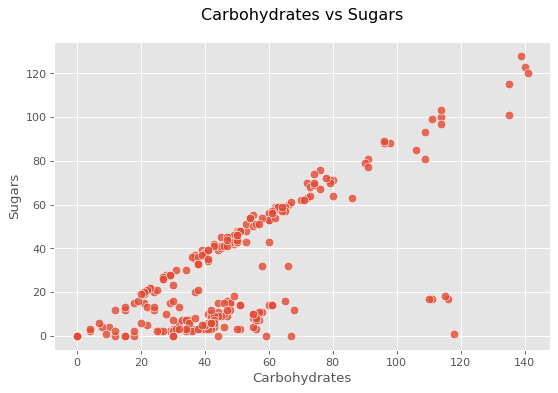

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5),dpi=80)
sns.scatterplot(x='Carbohydrates',y='Sugars',data=df,alpha=0.8,s=60)
plt.title('Carbohydrates vs Sugars',x=0.5,y=1.05)

<font size=5><b>Average Nutrient Analysis(% Daily Value) for each of the Categories</b></font>


In [15]:
cols=['Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)',
      'Iron (% Daily Value)','Total Fat (% Daily Value)',
      'Cholesterol (% Daily Value)','Carbohydrates (% Daily Value)']

table=df.pivot_table(columns='Category',values=cols)
table.style.background_gradient(cmap='viridis')

Category,Beef & Pork,Beverages,Breakfast,Chicken & Fish,Coffee & Tea,Desserts,Salads,Smoothies & Shakes,Snacks & Sides
Calcium (% Daily Value),23.000000,2.962963,16.166667,15.444444,28.294737,11.428571,15.000000,35.571429,6.000000
Carbohydrates (% Daily Value),13.466667,9.592593,16.571429,16.333333,14.863158,11.571429,7.166667,30.142857,9.615385
Cholesterol (% Daily Value),28.933333,0.185185,50.952381,25.222222,9.378947,4.857143,17.333333,14.714286,6.230769
Iron (% Daily Value),23.333333,0.296296,17.142857,16.370370,2.147368,4.000000,10.333333,3.964286,6.615385
Total Fat (% Daily Value),38.600000,0.148148,42.666667,41.333333,12.357895,11.142857,18.333333,21.714286,16.230769
Vitamin A (% Daily Value),6.933333,0.740741,6.928571,20.444444,10.736842,5.142857,146.666667,18.750000,4.846154
Vitamin C (% Daily Value),7.333333,23.481481,8.904762,12.629630,0.000000,4.142857,28.333333,6.964286,28.153846


<font size=4><b>For each Category below we analyze the items with highest amount of Nutrients in the Mc Donald's menu</b></font>

<font size=5><b>Breakfast</b></font>

In [16]:
breakfast=df[df['Category']=='Breakfast']
cols=['Calories','Total Fat','Carbohydrates','Sodium','Protein','Dietary Fiber']
for col in cols:
    print(col)
    a=breakfast.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Item
Big Breakfast with Hotcakes (Large Biscuit)    1150
Name: Calories, dtype: int64
----------------------------------------


Total Fat
Item
Big Breakfast with Hotcakes (Large Biscuit)    60.0
Name: Total Fat, dtype: float64
----------------------------------------


Carbohydrates
Item
Big Breakfast with Hotcakes (Large Biscuit)    116
Name: Carbohydrates, dtype: int64
----------------------------------------


Sodium
Item
Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)    2290
Name: Sodium, dtype: int64
----------------------------------------


Protein
Item
Big Breakfast with Hotcakes (Large Biscuit)    36
Name: Protein, dtype: int64
----------------------------------------


Dietary Fiber
Item
Big Breakfast with Hotcakes (Large Biscuit)    7
Name: Dietary Fiber, dtype: int64
----------------------------------------




<font size=5><b>Chicken & Fish</b></font>

In [17]:
chfish=df[df['Category']=='Chicken & Fish']
cols=['Calories','Total Fat','Carbohydrates','Sodium','Protein','Dietary Fiber']
for col in cols:
    print(col)
    a=chfish.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Item
Chicken McNuggets (40 piece)    1880
Name: Calories, dtype: int64
----------------------------------------


Total Fat
Item
Chicken McNuggets (40 piece)    118.0
Name: Total Fat, dtype: float64
----------------------------------------


Carbohydrates
Item
Chicken McNuggets (40 piece)    118
Name: Carbohydrates, dtype: int64
----------------------------------------


Sodium
Item
Chicken McNuggets (40 piece)    3600
Name: Sodium, dtype: int64
----------------------------------------


Protein
Item
Chicken McNuggets (40 piece)    87
Name: Protein, dtype: int64
----------------------------------------


Dietary Fiber
Item
Chicken McNuggets (40 piece)    6
Name: Dietary Fiber, dtype: int64
----------------------------------------




<font size=5><b>Beverages</b></font>

In [18]:
bev=df[df['Category']=='Beverages']
cols=['Calories','Total Fat','Carbohydrates','Sodium','Protein','Dietary Fiber']
for col in cols:
    print(col)
    a=bev.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Item
Coca-Cola Classic (Large)    280
Name: Calories, dtype: int64
----------------------------------------


Total Fat
Item
1% Low Fat Milk Jug    2.5
Name: Total Fat, dtype: float64
----------------------------------------


Carbohydrates
Item
Coca-Cola Classic (Large)    76
Name: Carbohydrates, dtype: int64
----------------------------------------


Sodium
Item
Diet Dr Pepper (Large)    140
Name: Sodium, dtype: int64
----------------------------------------


Protein
Item
Fat Free Chocolate Milk Jug    9
Name: Protein, dtype: int64
----------------------------------------


Dietary Fiber
Item
Fat Free Chocolate Milk Jug    1
Name: Dietary Fiber, dtype: int64
----------------------------------------




<font size=5><b>Smoothies & Shakes</b></font>

In [19]:
shakes=df[df['Category']=='Smoothies & Shakes']
cols=['Calories','Total Fat','Carbohydrates','Sodium','Protein','Dietary Fiber']
for col in cols:
    print(col)
    a=shakes.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Item
McFlurry with M&M’s Candies (Medium)    930
Name: Calories, dtype: int64
----------------------------------------


Total Fat
Item
McFlurry with M&M’s Candies (Medium)    33.0
Name: Total Fat, dtype: float64
----------------------------------------


Carbohydrates
Item
Chocolate Shake (Large)    141
Name: Carbohydrates, dtype: int64
----------------------------------------


Sodium
Item
McFlurry with Reese's Peanut Butter Cups (Medium)    400
Name: Sodium, dtype: int64
----------------------------------------


Protein
Item
McFlurry with Reese's Peanut Butter Cups (Medium)    21
Name: Protein, dtype: int64
----------------------------------------


Dietary Fiber
Item
Blueberry Pomegranate Smoothie (Large)    5
Name: Dietary Fiber, dtype: int64
----------------------------------------




<font size=5><b>Salads</b></font>

In [20]:
salads=df[df['Category']=='Salads']
cols=['Calories','Total Fat','Carbohydrates','Sodium','Protein','Dietary Fiber','Cholesterol']
for col in cols:
    print(col)
    a=salads.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Item
Premium Southwest Salad with Crispy Chicken    450
Name: Calories, dtype: int64
----------------------------------------


Total Fat
Item
Premium Southwest Salad with Crispy Chicken    22.0
Name: Total Fat, dtype: float64
----------------------------------------


Carbohydrates
Item
Premium Southwest Salad with Crispy Chicken    42
Name: Carbohydrates, dtype: int64
----------------------------------------


Sodium
Item
Premium Bacon Ranch Salad with Crispy Chicken    860
Name: Sodium, dtype: int64
----------------------------------------


Protein
Item
Premium Bacon Ranch Salad with Grilled Chicken    29
Name: Protein, dtype: int64
----------------------------------------


Dietary Fiber
Item
Premium Southwest Salad with Crispy Chicken    7
Name: Dietary Fiber, dtype: int64
----------------------------------------


Cholesterol
Item
Premium Bacon Ranch Salad with Grilled Chicken    85
Name: Cholesterol, dtype: int64
----------------------------------------




<font size=5>Do upvote if found insightful🙂</font>